In [129]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt

import keras
import cv2
import os
import glob
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.6.9
Tensorflow version: 2.3.0
Keras version: 2.4.0


In [130]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [131]:
!ls /content/gdrive/'My Drive'/dataset/

fruit-360.zip  nfruits.zip


In [132]:
!unzip "/content/gdrive/My Drive/dataset/nfruits.zip"

Archive:  /content/gdrive/My Drive/dataset/nfruits.zip
replace fruits-360/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [133]:
!ls

fruits-360  gdrive  model.tflite  sample_data


In [134]:
print(os.listdir("../content/fruits-360"))

['Test', 'Training', 'readme.md', 'LICENSE']


In [135]:
img=glob.glob(("../content/fruits-360/Training/*"))
for i in img:
    print(i)

../content/fruits-360/Training/Tangelo
../content/fruits-360/Training/Nectarine
../content/fruits-360/Training/Fig
../content/fruits-360/Training/Plum
../content/fruits-360/Training/Blueberry
../content/fruits-360/Training/Potato White
../content/fruits-360/Training/Cucumber Ripe
../content/fruits-360/Training/Beetroot
../content/fruits-360/Training/Potato Red
../content/fruits-360/Training/Pitahaya Red
../content/fruits-360/Training/Mulberry
../content/fruits-360/Training/Cactus fruit
../content/fruits-360/Training/Lemon
../content/fruits-360/Training/Pepper Orange
../content/fruits-360/Training/Kohlrabi
../content/fruits-360/Training/Dates
../content/fruits-360/Training/Physalis
../content/fruits-360/Training/Mango
../content/fruits-360/Training/Pear
../content/fruits-360/Training/Grape Blue
../content/fruits-360/Training/Kumquats
../content/fruits-360/Training/Lychee
../content/fruits-360/Training/Walnut
../content/fruits-360/Training/Orange
../content/fruits-360/Training/Pepino
../

In [136]:
training_fruit_img = []
training_label = []
for dir_path in glob.glob("../content/fruits-360/Training/*"):
    img_label = dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        training_fruit_img.append(image)
        training_label.append(img_label)
training_fruit_img = np.array(training_fruit_img)
training_label = np.array(training_label)
len(np.unique(training_label))

64

In [137]:
label_to_id = {v:k for k,v in enumerate(np.unique(training_label)) }
id_to_label = {v:k for k,v in label_to_id.items() }

In [138]:
print(id_to_label)

{0: 'Apple Red Delicious', 1: 'Apricot', 2: 'Avocado', 3: 'Banana', 4: 'Beetroot', 5: 'Blueberry', 6: 'Cactus fruit', 7: 'Cantaloupe 1', 8: 'Carambula', 9: 'Cauliflower', 10: 'Cherry Wax Black', 11: 'Chestnut', 12: 'Clementine', 13: 'Cocos', 14: 'Corn', 15: 'Cucumber Ripe', 16: 'Dates', 17: 'Fig', 18: 'Ginger Root', 19: 'Granadilla', 20: 'Grape Blue', 21: 'Guava', 22: 'Hazelnut', 23: 'Huckleberry', 24: 'Kaki', 25: 'Kiwi', 26: 'Kohlrabi', 27: 'Kumquats', 28: 'Lemon', 29: 'Limes', 30: 'Lychee', 31: 'Mandarine', 32: 'Mango', 33: 'Maracuja', 34: 'Melon Piel de Sapo', 35: 'Mulberry', 36: 'Nectarine', 37: 'Nut Forest', 38: 'Onion White', 39: 'Orange', 40: 'Papaya', 41: 'Peach', 42: 'Pear', 43: 'Pepino', 44: 'Pepper Orange', 45: 'Physalis', 46: 'Pineapple', 47: 'Pitahaya Red', 48: 'Plum', 49: 'Pomegranate', 50: 'Pomelo Sweetie', 51: 'Potato Red', 52: 'Potato White', 53: 'Quince', 54: 'Rambutan', 55: 'Raspberry', 56: 'Redcurrant', 57: 'Salak', 58: 'Strawberry', 59: 'Tamarillo', 60: 'Tangelo', 

In [139]:
print(len(training_label))

32332


In [140]:
training_label_id = np.array([label_to_id[i] for i in training_label])
training_label_id

array([60, 60, 60, ..., 19, 19, 19])

In [141]:
training_fruit_img.shape,training_label_id.shape

((32332, 64, 64, 3), (32332,))

In [142]:
validation_fruit_img=[]
validation_label =[]
for dir_path in glob.glob("../content/fruits-360/Test/*"):
    img_label = dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_img.append(image)
        validation_label.append(img_label)
validation_fruit_img = np.array(validation_fruit_img)
validation_label = np.array(validation_label)

In [143]:
len(np.unique(validation_label))

62

In [144]:
validation_label_id = np.array([label_to_id[i] for i in validation_label])

In [145]:
validation_fruit_img.shape,validation_label_id.shape

((9205, 64, 64, 3), (9205,))

In [146]:
X_train,X_test = training_fruit_img,validation_fruit_img
Y_train,Y_test =training_label_id,validation_label_id
X_train = X_train/255
X_test = X_test/255

X_flat_train = X_train.reshape(X_train.shape[0],64*64*3)
X_flat_test = X_test.reshape(X_test.shape[0],64*64*3)

#One Hot Encode the Output
Y_train = keras.utils.to_categorical(Y_train, 120)
Y_test = keras.utils.to_categorical(Y_test, 120)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (32332, 64, 64, 3) (9205, 64, 64, 3) (32332, 120) (9205, 120)
Flattened: (32332, 12288) (9205, 12288)


(64, 64, 3)


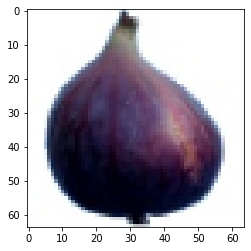

In [147]:
print(X_train[1200].shape)
plt.imshow(X_train[1200])
plt.show()

In [148]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

In [149]:
model = Sequential()
model.add(Conv2D(16,(5,5),input_shape=(64,64,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(5,5),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(5,5),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
#model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 16)        1216      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        12832     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)       

In [150]:
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
          print("\nAkurasi telah mencapai >90%!")
          self.model.stop_training = True
    callbacks = myCallback()

In [151]:
model.compile(loss='categorical_crossentropy',
             optimizer = Adamax(),
             metrics=['accuracy'])

history = model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          callbacks=[callbacks],
          validation_data = (X_test,Y_test)
         )

Epoch 1/12
253/253 [==============================] - 370s 1s/step - loss: 1.1757 - accuracy: 0.6949 - val_loss: 11.2125 - val_accuracy: 0.0202
Epoch 2/12
253/253 [==============================] - 371s 1s/step - loss: 0.1882 - accuracy: 0.9517 - val_loss: 2.1652 - val_accuracy: 0.4474
Epoch 3/12
253/253 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9779
Akurasi telah mencapai >90%!
253/253 [==============================] - 369s 1s/step - loss: 0.0889 - accuracy: 0.9779 - val_loss: 0.2059 - val_accuracy: 0.9473


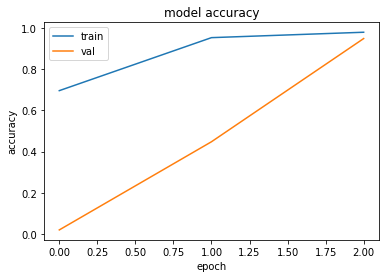

In [158]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

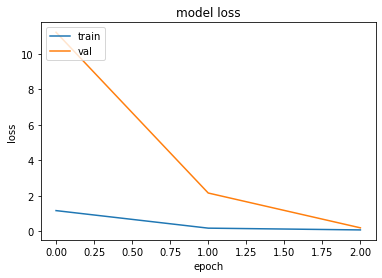

In [157]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [155]:
    # Konversi model.
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmplj_7vv8y/assets


INFO:tensorflow:Assets written to: /tmp/tmplj_7vv8y/assets


In [156]:
    with tf.io.gfile.GFile('model.tflite', 'wb') as f:
      f.write(tflite_model)